In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

# Synthetic Data Creation

In [2]:
df_ini = pd.read_csv("/kaggle/input/historic-train-running-weather-and-location/synthetic_dataset_with_curr_station.csv")
df_ini.head()

,temp,feels_like,temp_min,temp_max,humidity,pressure,wind_speed,wind_deg,visibility,weather_main,weather_desc,lat,lon,altitude,sea_level,dew_point,clouds,day_of_week,train_number,train_name,origin_code,origin_name,dest_code,dest_name,scheduled_arr_time,actual_arr_time,scheduled_dept_time,actual_dept_time,dwell_minutes,day_of_journey,curr_station_code
0,296.16,295.176594,294.929605,297.341504,52.0,1019,17.51,351,77,Fog,dense fog,20.4971,81.5425,998.0,296.16,9.74,34.37,Sunday,22105,Train_22105,JAT,Jammu Tawi,PUNE,Pune,2025-09-12 01:09:00,2025-09-12 01:06:00,2025-09-12 01:33:00,2025-09-12 01:55:00,49,1,JAT
1,289.63,290.306772,288.772736,289.640032,79.0,1012,10.88,309,42,Clear,clear sky,24.5384,82.0181,428.0,289.63,9.92,32.67,Monday,12964,Train_12964,BBS,Bhubaneswar,CSTM,Mumbai CST,2025-09-12 01:37:00,2025-09-12 01:33:00,2025-09-12 01:44:00,2025-09-12 01:52:00,19,1,BBS
2,304.58,305.071829,303.358091,304.816890,100.0,1019,6.73,277,40,Clear,clear sky,16.3244,76.9114,726.0,304.58,7.75,30.03,Tuesday,18518,Train_18518,ALD,Prayagraj,DDN,Dehradun,2025-09-12 02:03:00,2025-09-12 02:15:00,2025-09-12 02:32:00,2025-09-12 02:30:00,15,1,ALD
3,285.89,287.429004,284.237662,287.143537,95.0,1010,11.78,96,53,Rain,moderate rain,16.0779,75.7695,171.0,285.89,8.90,6.30,Wednesday,12011,Train_12011,PNBE,Patna Jn,MAS,Chennai Central,2025-09-12 03:57:00,2025-09-12 03:59:00,2025-09-12 04:04:00,2025-09-12 04:07:00,8,1,PNBE
4,288.64,288.137026,288.603297,289.273004,86.0,1011,11.68,118,97,Fog,dense fog,27.1549,78.5737,807.0,288.64,12.65,35.95,Thursday,12011,Train_12011,VSKP,Visakhapatnam,PUNE,Pune,2025-09-12 05:46:00,2025-09-12 05:49:00,2025-09-12 06:01:00,2025-09-12 06:17:00,28,1,PNBE


In [3]:
df_length = df_ini.shape[0]
df_length

100

In [4]:
df_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 100 non-null    float64
 1   feels_like           100 non-null    float64
 2   temp_min             100 non-null    float64
 3   temp_max             100 non-null    float64
 4   humidity             89 non-null     float64
 5   pressure             100 non-null    int64  
 6   wind_speed           100 non-null    float64
 7   wind_deg             100 non-null    int64  
 8   visibility           100 non-null    int64  
 9   weather_main         100 non-null    object 
 10  weather_desc         100 non-null    object 
 11  lat                  100 non-null    float64
 12  lon                  100 non-null    float64
 13  altitude             96 non-null     float64
 14  sea_level            100 non-null    float64
 15  dew_point            100 non-null    floa

In [5]:
df_ini.describe()

,temp,feels_like,temp_min,temp_max,humidity,pressure,wind_speed,wind_deg,visibility,lat,lon,altitude,sea_level,dew_point,clouds,train_number,dwell_minutes,day_of_journey
count,100.00000,100.000000,100.000000,100.000000,89.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,96.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,300.46760,300.862356,299.452037,301.633285,73.213483,1012.040000,10.316400,184.160000,69.380000,21.925473,77.128913,540.791667,300.46760,9.798600,23.942900,13525.960000,13.68000,2.600000
std,9.52964,9.759538,9.538024,9.485400,15.254263,4.683778,4.911467,109.366008,18.358814,3.574993,4.136175,248.770997,9.52964,3.179575,10.542714,2535.339903,15.11764,1.206045
min,285.13000,285.248923,284.237662,286.322061,50.000000,1005.000000,2.210000,5.000000,40.000000,15.331100,70.042200,104.000000,285.13000,5.060000,5.460000,11010.000000,-21.00000,1.000000
25%,291.95000,291.865859,290.451254,292.697193,60.000000,1008.000000,6.295000,83.750000,54.000000,18.881125,73.771700,366.000000,291.95000,7.065000,13.452500,12280.000000,4.00000,2.000000
50%,300.35000,301.342400,299.353498,301.348407,72.000000,1011.500000,11.065000,201.500000,70.000000,22.160200,77.029950,576.500000,300.35000,9.485000,25.655000,12505.500000,14.50000,3.000000
75%,310.39500,311.115406,308.866861,311.644751,86.000000,1016.000000,14.145000,281.000000,86.250000,24.812375,80.067750,727.000000,310.39500,13.052500,32.930000,14014.000000,23.00000,4.000000
max,314.90000,316.464793,314.775312,316.073184,100.000000,1020.000000,19.870000,357.000000,99.000000,27.919600,84.980500,998.000000,314.90000,14.830000,39.970000,22105.000000,49.00000,5.000000


In [6]:
df_ini.dtypes

temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
humidity               float64
pressure                 int64
wind_speed             float64
wind_deg                 int64
visibility               int64
weather_main            object
weather_desc            object
lat                    float64
lon                    float64
altitude               float64
sea_level              float64
dew_point              float64
clouds                 float64
day_of_week             object
train_number             int64
train_name              object
origin_code             object
origin_name             object
dest_code               object
dest_name               object
scheduled_arr_time      object
actual_arr_time         object
scheduled_dept_time     object
actual_dept_time        object
dwell_minutes            int64
day_of_journey           int64
curr_station_code       object
dtype: object

In [7]:
for col in df_ini:
    if df_ini[col].nunique() <= 10:
        print(f'Number of unique values in {col} is {df_ini[col].nunique()} and the null values are: {df_ini[col].isnull().sum()}')

Number of unique values in weather_main is 6 and the null values are: 0
Number of unique values in weather_desc is 6 and the null values are: 0
Number of unique values in day_of_week is 7 and the null values are: 0
Number of unique values in day_of_journey is 5 and the null values are: 0


Since these values attributes happen to have class values, we may go ahead with encoding them appropriately.
But before we encode, we will clean the data for missing values.

## Synthetic Data Preprocessing

### Data Cleaning

#### Drop Columns with more than 20 null values

In [8]:
df_droppedna = df_ini.dropna(thresh = df_length - 20, axis = 1)
df_droppedna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 100 non-null    float64
 1   feels_like           100 non-null    float64
 2   temp_min             100 non-null    float64
 3   temp_max             100 non-null    float64
 4   humidity             89 non-null     float64
 5   pressure             100 non-null    int64  
 6   wind_speed           100 non-null    float64
 7   wind_deg             100 non-null    int64  
 8   visibility           100 non-null    int64  
 9   weather_main         100 non-null    object 
 10  weather_desc         100 non-null    object 
 11  lat                  100 non-null    float64
 12  lon                  100 non-null    float64
 13  altitude             96 non-null     float64
 14  sea_level            100 non-null    float64
 15  dew_point            100 non-null    floa

None of the data columns were dropped since

#### Dropping Rows with more than 5 null values

In [9]:
df_droppednarows = df_droppedna.dropna(thresh = 25)
df_droppednarows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 100 non-null    float64
 1   feels_like           100 non-null    float64
 2   temp_min             100 non-null    float64
 3   temp_max             100 non-null    float64
 4   humidity             89 non-null     float64
 5   pressure             100 non-null    int64  
 6   wind_speed           100 non-null    float64
 7   wind_deg             100 non-null    int64  
 8   visibility           100 non-null    int64  
 9   weather_main         100 non-null    object 
 10  weather_desc         100 non-null    object 
 11  lat                  100 non-null    float64
 12  lon                  100 non-null    float64
 13  altitude             96 non-null     float64
 14  sea_level            100 non-null    float64
 15  dew_point            100 non-null    floa

None of the rows were dropped

In [10]:
for col in df_droppednarows:
    if (df_droppednarows[col].isnull().sum() > 0):
        print(col, df_droppednarows[col].isnull().sum())

humidity 11
altitude 4


#### Imputing Humidity

Finally we have the two columns: humidity and altitude that we need to impute for null values.

In [11]:
print(df_droppednarows['humidity'].nunique())

41


In [12]:
print(df_droppednarows['humidity'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: humidity
Non-Null Count  Dtype  
--------------  -----  
89 non-null     float64
dtypes: float64(1)
memory usage: 932.0 bytes
None


We can clearly observe that the type of data is float and it is a measureable continuous data

Mean Imputation

In [13]:
df_clean_ini = df_droppednarows
df_clean_ini['humidity'] = df_droppednarows['humidity'].fillna(round(df_droppednarows['humidity'].mean()))
print(df_clean_ini['humidity'].isnull().sum())

0


#### Imputing altitude

In [14]:
print(df_clean_ini['altitude'].nunique())

87


In [15]:
df_clean2 = df_clean_ini
df_clean2['altitude'] = df_clean_ini['altitude'].fillna(round(df_clean_ini['altitude'].mean(), 2))
print(df_clean2['altitude'].isnull().sum())
df_clean2['altitude'].head()

0


0    998.0
1    428.0
2    726.0
3    171.0
4    807.0
Name: altitude, dtype: float64

In [16]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 100 non-null    float64
 1   feels_like           100 non-null    float64
 2   temp_min             100 non-null    float64
 3   temp_max             100 non-null    float64
 4   humidity             100 non-null    float64
 5   pressure             100 non-null    int64  
 6   wind_speed           100 non-null    float64
 7   wind_deg             100 non-null    int64  
 8   visibility           100 non-null    int64  
 9   weather_main         100 non-null    object 
 10  weather_desc         100 non-null    object 
 11  lat                  100 non-null    float64
 12  lon                  100 non-null    float64
 13  altitude             100 non-null    float64
 14  sea_level            100 non-null    float64
 15  dew_point            100 non-null    floa

### Data is finally clean from all the null value

## Exploratory Data Analysis of the Synthetic Data

### Univariate Analysis

In [17]:
df_clean2.dtypes

temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
humidity               float64
pressure                 int64
wind_speed             float64
wind_deg                 int64
visibility               int64
weather_main            object
weather_desc            object
lat                    float64
lon                    float64
altitude               float64
sea_level              float64
dew_point              float64
clouds                 float64
day_of_week             object
train_number             int64
train_name              object
origin_code             object
origin_name             object
dest_code               object
dest_name               object
scheduled_arr_time      object
actual_arr_time         object
scheduled_dept_time     object
actual_dept_time        object
dwell_minutes            int64
day_of_journey           int64
curr_station_code       object
dtype: object

### Drop unnecessary columns

In [18]:
df_clean2 = df_clean2.drop(['train_number', 'train_name', 'origin_name', 'dest_name', 'weather_main'], axis = 1)
df_clean2.columns

Index(['temp', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'pressure',
       'wind_speed', 'wind_deg', 'visibility', 'weather_desc', 'lat', 'lon',
       'altitude', 'sea_level', 'dew_point', 'clouds', 'day_of_week',
       'origin_code', 'dest_code', 'scheduled_arr_time', 'actual_arr_time',
       'scheduled_dept_time', 'actual_dept_time', 'dwell_minutes',
       'day_of_journey', 'curr_station_code'],
      dtype='object')

In [19]:
df_clean2.shape

(100, 26)

#### Find Continuous columns

In [20]:
# Select initial continuous columns
continuous_cols_ini = df_clean2.select_dtypes(include = ['float64', 'int64']).columns

# Create a new list containing only the columns with 10 or more unique values
continuous_cols = [col for col in continuous_cols_ini if df_clean2[col].nunique() >= 10]

# You can now use final_continuous_cols for your analysis
print(len(continuous_cols))
continuous_cols

16


['temp',
 'feels_like',
 'temp_min',
 'temp_max',
 'humidity',
 'pressure',
 'wind_speed',
 'wind_deg',
 'visibility',
 'lat',
 'lon',
 'altitude',
 'sea_level',
 'dew_point',
 'clouds',
 'dwell_minutes']

## Plotting 

### Histograms

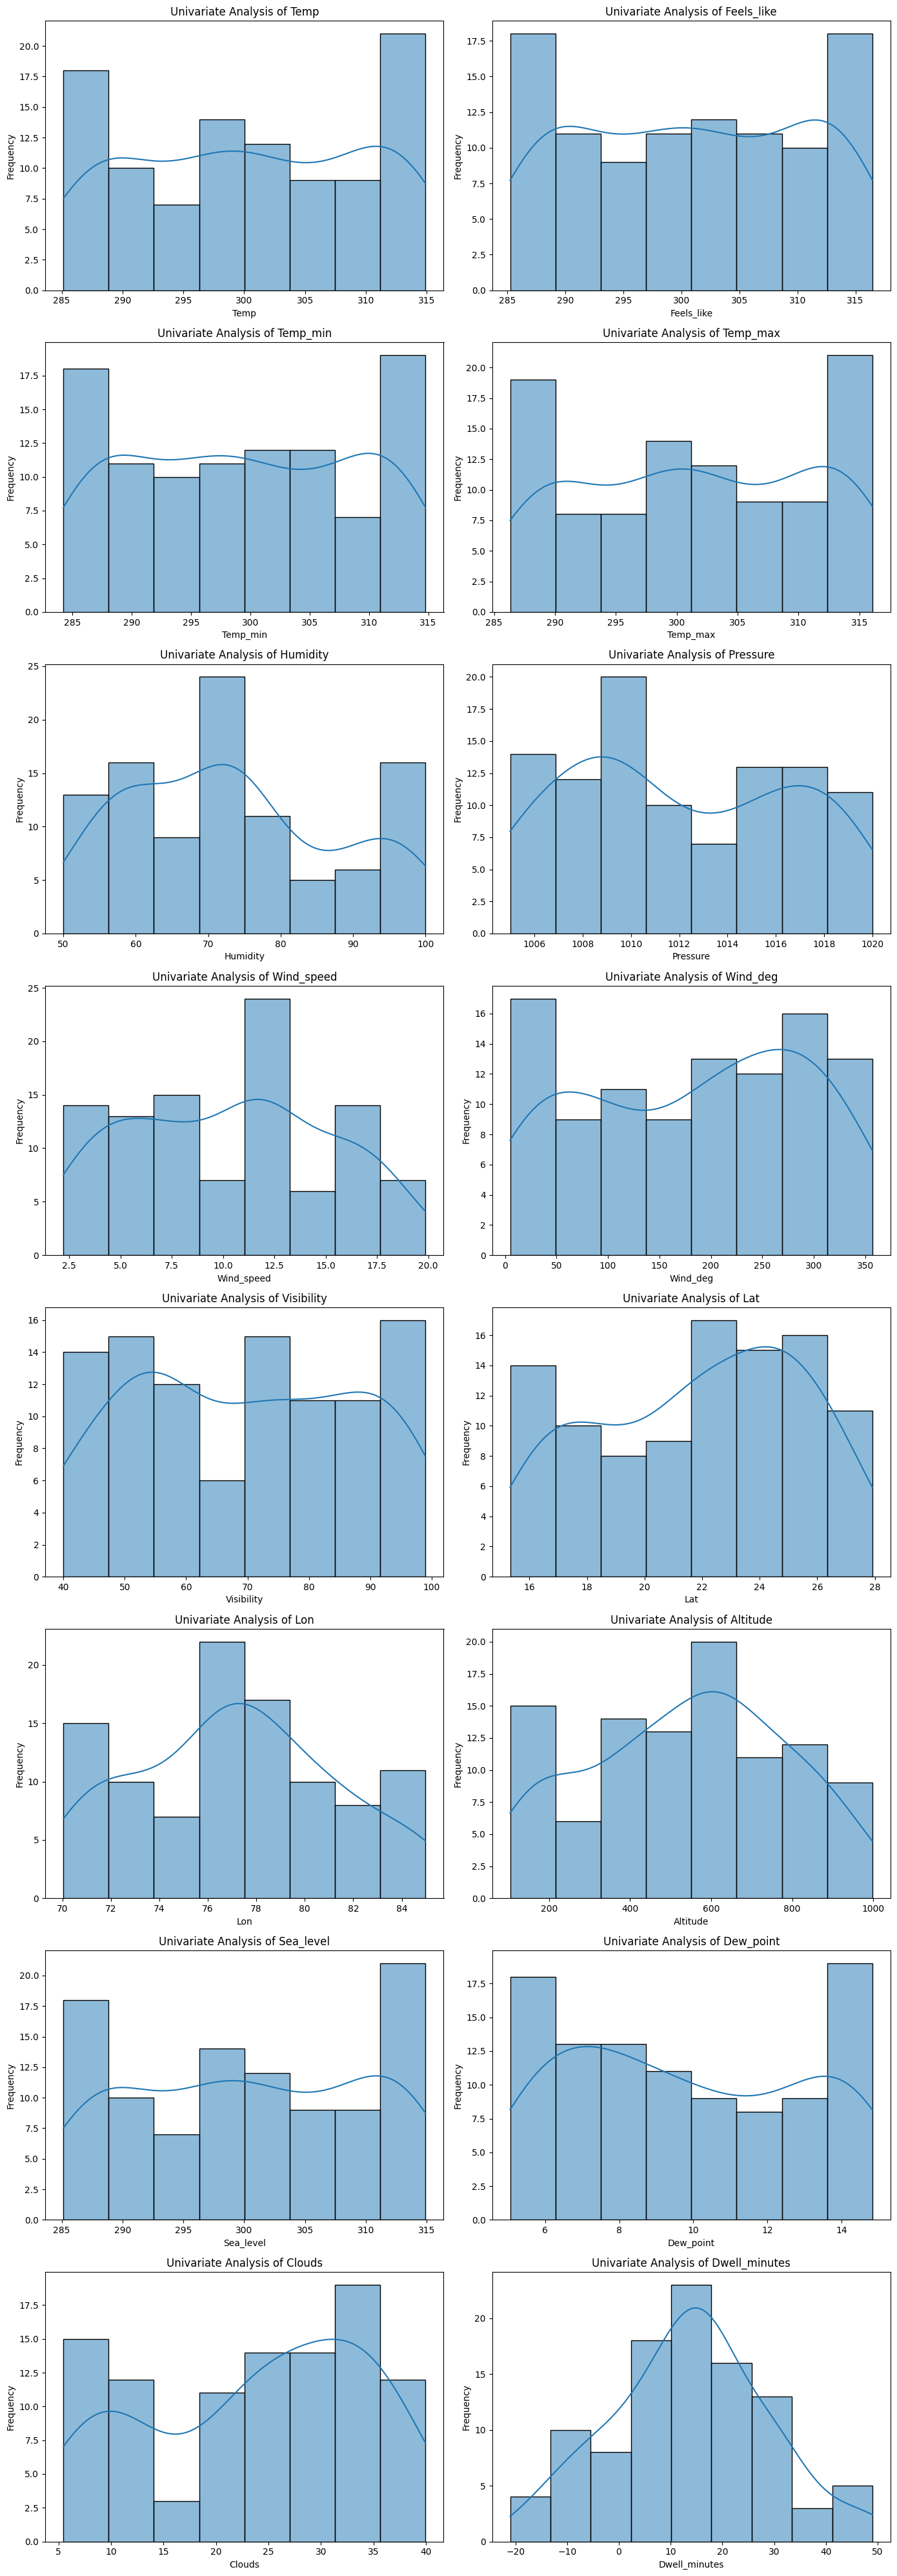

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

n_rows = math.ceil(len(continuous_cols) / 2)

fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
axes = axes.flatten()  # flatten in case it's 2D

for i, col in enumerate(continuous_cols):
    sns.histplot(df_clean2[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Univariate Analysis of {col.capitalize()}')
    axes[i].set_xlabel(f'{col.capitalize()}')
    axes[i].set_ylabel('Frequency')

# hide unused subplots (if odd number of columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Box Plots

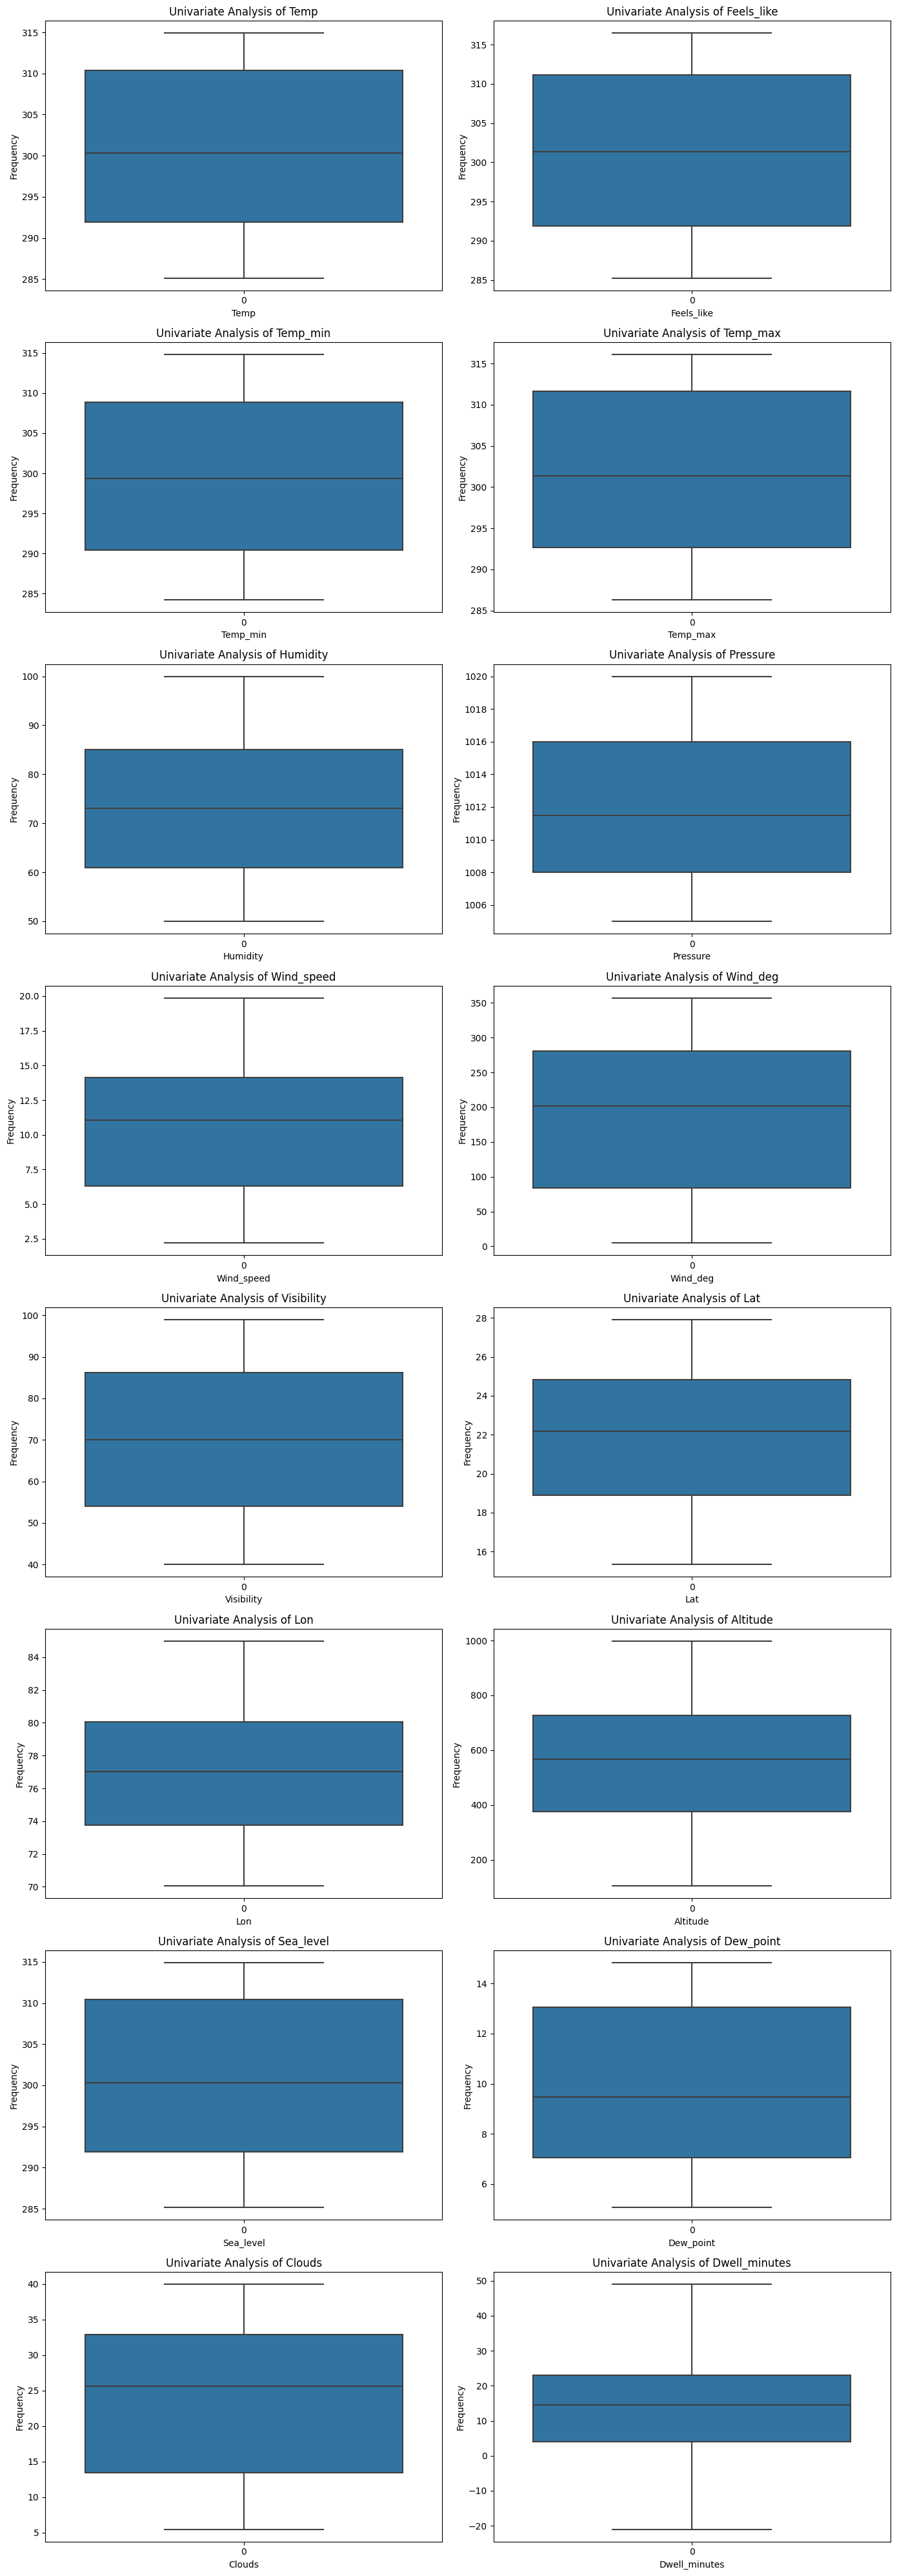

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

n_rows = math.ceil(len(continuous_cols) / 2)

fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
axes = axes.flatten()  # flatten in case it's 2D

for i, col in enumerate(continuous_cols):
    sns.boxplot(df_clean2[col], ax=axes[i])
    axes[i].set_title(f'Univariate Analysis of {col.capitalize()}')
    axes[i].set_xlabel(f'{col.capitalize()}')
    axes[i].set_ylabel('Frequency')

# hide unused subplots (if odd number of columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [23]:
df_clean2[continuous_cols].describe()

,temp,feels_like,temp_min,temp_max,humidity,pressure,wind_speed,wind_deg,visibility,lat,lon,altitude,sea_level,dew_point,clouds,dwell_minutes
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000
mean,300.46760,300.862356,299.452037,301.633285,73.190000,1012.040000,10.316400,184.160000,69.380000,21.925473,77.128913,540.791600,300.46760,9.798600,23.942900,13.68000
std,9.52964,9.759538,9.538024,9.485400,14.382014,4.683778,4.911467,109.366008,18.358814,3.574993,4.136175,243.693503,9.52964,3.179575,10.542714,15.11764
min,285.13000,285.248923,284.237662,286.322061,50.000000,1005.000000,2.210000,5.000000,40.000000,15.331100,70.042200,104.000000,285.13000,5.060000,5.460000,-21.00000
25%,291.95000,291.865859,290.451254,292.697193,61.000000,1008.000000,6.295000,83.750000,54.000000,18.881125,73.771700,375.000000,291.95000,7.065000,13.452500,4.00000
50%,300.35000,301.342400,299.353498,301.348407,73.000000,1011.500000,11.065000,201.500000,70.000000,22.160200,77.029950,565.500000,300.35000,9.485000,25.655000,14.50000
75%,310.39500,311.115406,308.866861,311.644751,85.000000,1016.000000,14.145000,281.000000,86.250000,24.812375,80.067750,726.000000,310.39500,13.052500,32.930000,23.00000
max,314.90000,316.464793,314.775312,316.073184,100.000000,1020.000000,19.870000,357.000000,99.000000,27.919600,84.980500,998.000000,314.90000,14.830000,39.970000,49.00000


### There are rows with negative dwell minutes.

In [24]:
neg_dwell = df_clean2.drop([i for i in range(df_clean2.shape[0]) if df_clean2['dwell_minutes'][i] >= 0])
len(neg_dwell)

19

There are 19 such values where the dwell is negative. It is not logically correct, and hence, we will drop these rows

In [25]:
df_clean2 = df_clean2.drop([i for i in range(df_clean2.shape[0]) if df_clean2['dwell_minutes'][i] < 0])

In [26]:
df_clean2[continuous_cols].describe()

,temp,feels_like,temp_min,temp_max,humidity,pressure,wind_speed,wind_deg,visibility,lat,lon,altitude,sea_level,dew_point,clouds,dwell_minutes
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,300.500617,300.821816,299.511608,301.649043,72.395062,1012.098765,10.490123,175.728395,68.222222,21.910894,77.597465,532.053951,300.500617,9.591852,23.904938,18.864198
std,9.720485,9.924368,9.702321,9.718768,13.834449,4.624946,4.936169,110.007728,18.476336,3.627793,3.866424,239.413908,9.720485,3.151607,10.614181,11.506252
min,285.130000,285.248923,284.237662,286.322061,50.000000,1005.000000,2.210000,5.000000,40.000000,15.331100,70.136700,106.000000,285.130000,5.060000,5.460000,0.000000
25%,291.500000,291.802273,289.829638,291.973261,61.000000,1009.000000,6.730000,81.000000,53.000000,18.758500,75.647200,372.000000,291.500000,7.080000,13.250000,10.000000
50%,300.990000,301.353561,299.595551,301.553694,72.000000,1012.000000,11.080000,175.000000,70.000000,22.095700,77.504200,557.000000,300.990000,8.940000,25.650000,17.000000
75%,310.270000,311.696051,308.736764,311.602348,80.000000,1016.000000,14.190000,281.000000,84.000000,24.694900,80.416100,713.000000,310.270000,12.470000,32.960000,27.000000
max,314.900000,316.464793,314.775312,316.073184,100.000000,1020.000000,19.870000,357.000000,99.000000,27.919600,84.980500,998.000000,314.900000,14.830000,39.970000,49.000000


### Non-Continuous Cols

In [27]:
non_continuous_cols = [col for col in df_clean2.columns if col not in continuous_cols]
print(len(non_continuous_cols))
non_continuous_cols

10


['weather_desc',
 'day_of_week',
 'origin_code',
 'dest_code',
 'scheduled_arr_time',
 'actual_arr_time',
 'scheduled_dept_time',
 'actual_dept_time',
 'day_of_journey',
 'curr_station_code']

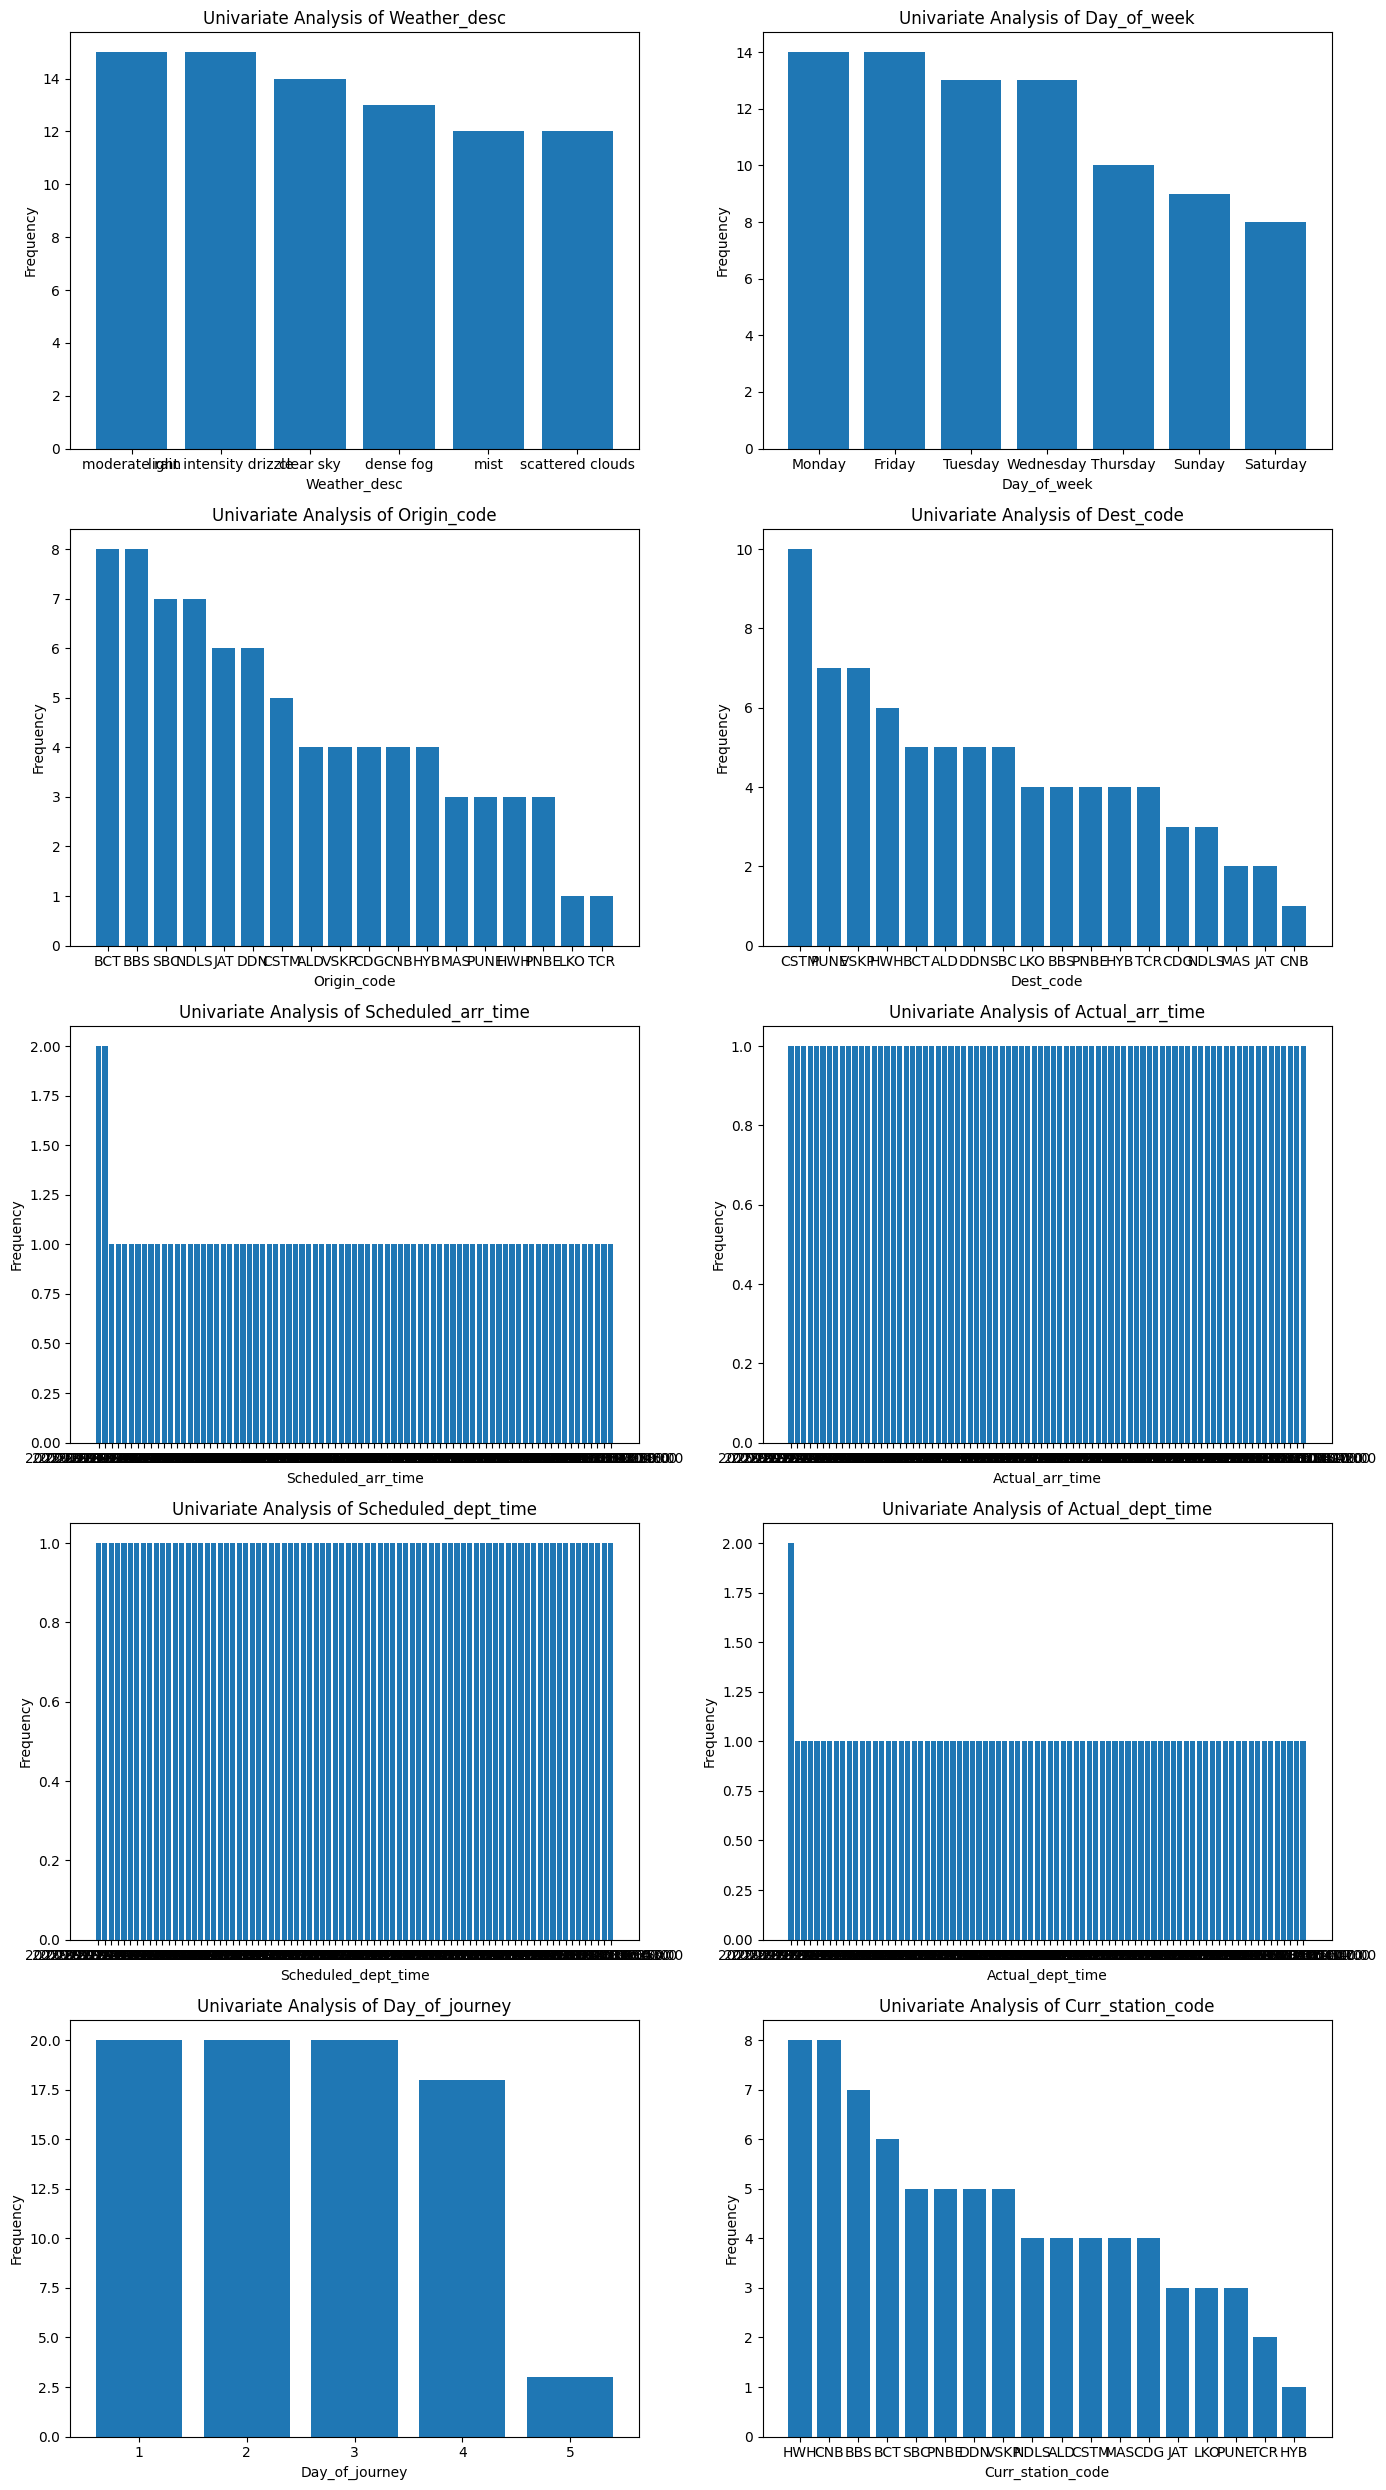

In [28]:
n_rows = math.ceil(len(non_continuous_cols) / 2)

fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(non_continuous_cols):
    axes[i].bar(df_clean2[col].value_counts().index, df_clean2[col].value_counts().values)
    axes[i].set_title(f'Univariate Analysis of {col.capitalize()}')
    axes[i].set_xlabel(f'{col.capitalize()}')
    axes[i].set_ylabel('Frequency')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

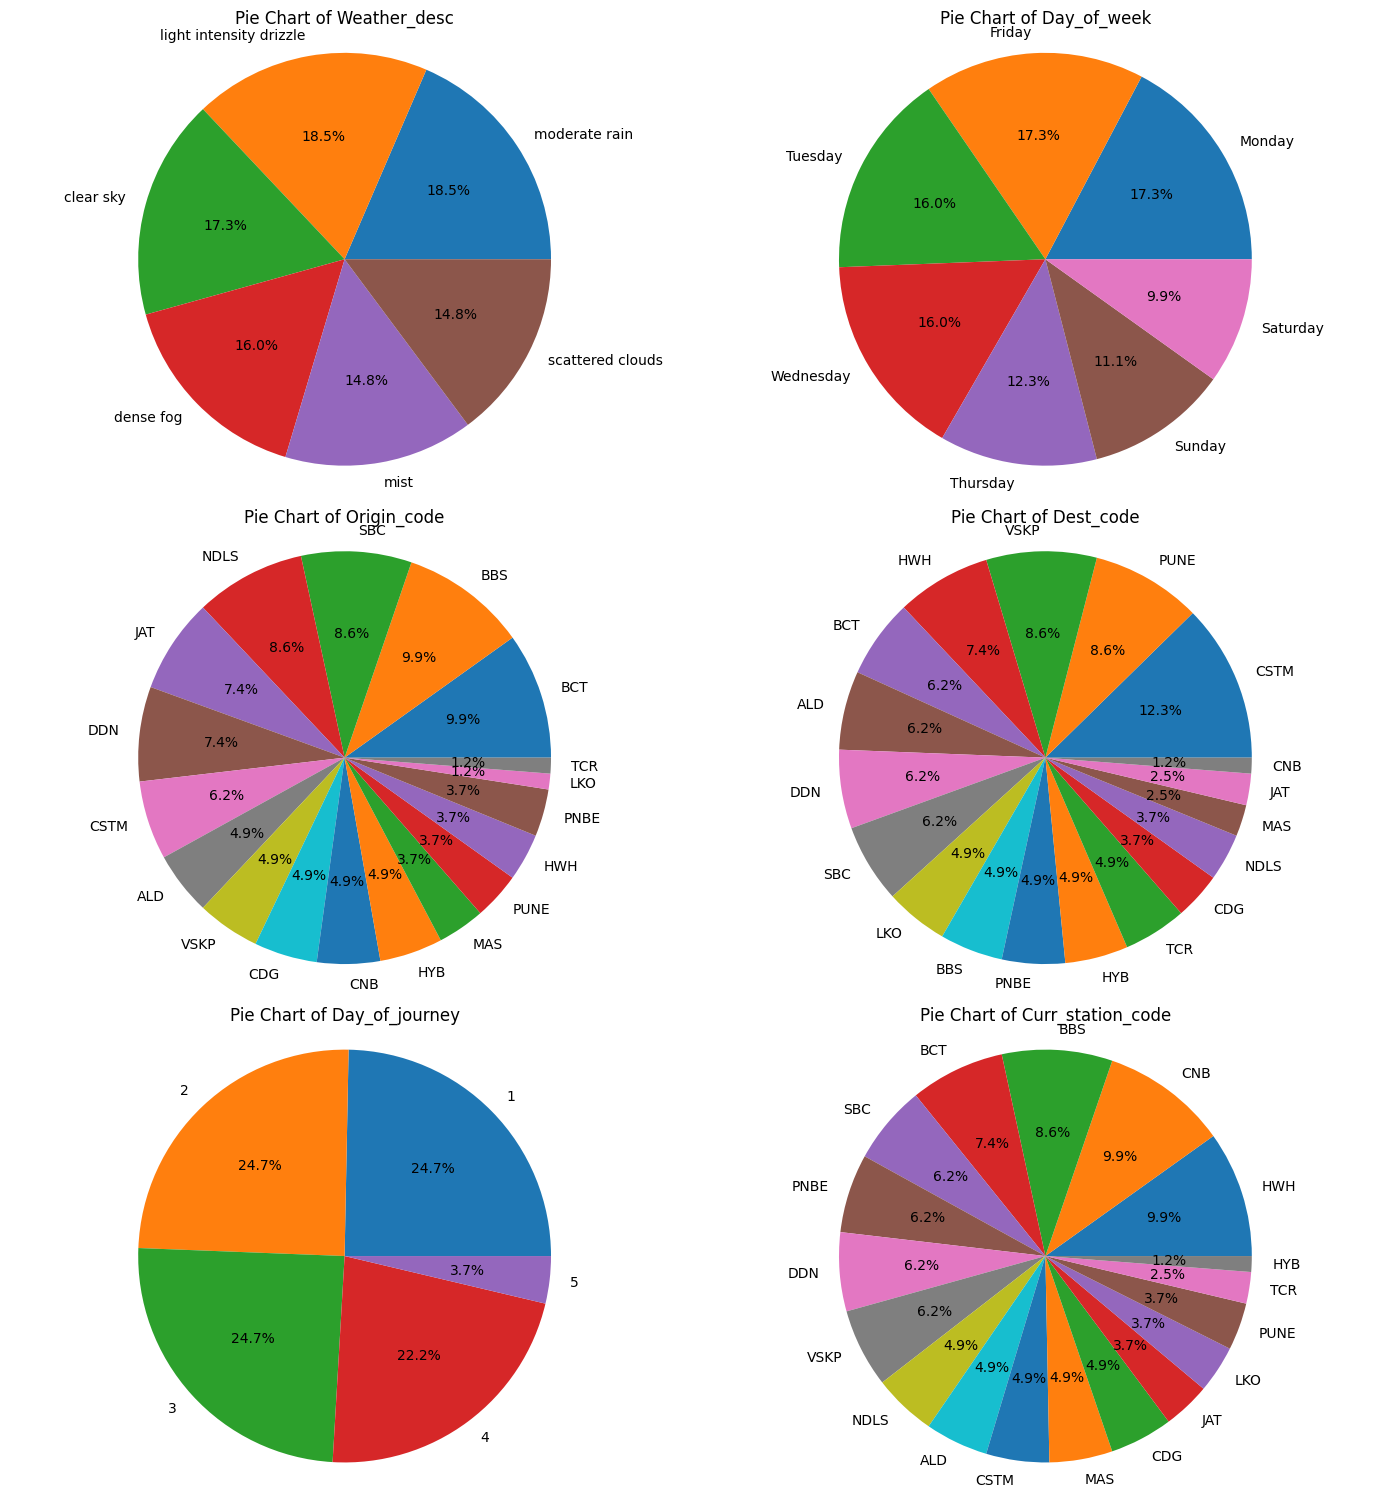

In [29]:
n_rows = math.ceil(len(non_continuous_cols) / 2)

fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
axes = axes.flatten()

skip_cols = ['scheduled_arr_time', 'scheduled_dept_time', 'actual_arr_time', 'actual_dept_time']

plot_idx = 0  # separate index for plotting
for col in non_continuous_cols:
    if col in skip_cols:
        continue  # skip unwanted columns

    counts = df_clean2[col].value_counts()
    axes[plot_idx].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    axes[plot_idx].set_title(f'Pie Chart of {col.capitalize()}')
    axes[plot_idx].axis('equal')
    plot_idx += 1

# delete unused axes
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Feature Engineering

## Delay Calculation

In [30]:
data = df_clean2[df_clean2['dest_code'] != df_clean2['curr_station_code']].reset_index(drop=True)

lst = []
total_delay = []

for i in range(data.shape[0]):
    sched_arr = pd.to_datetime(data['scheduled_arr_time'].iloc[i])
    actual_arr = pd.to_datetime(data['actual_arr_time'].iloc[i])
    sched = pd.to_datetime(data['scheduled_dept_time'].iloc[i])
    actual = pd.to_datetime(data['actual_dept_time'].iloc[i])
    dwell = pd.to_timedelta(data['dwell_minutes'].iloc[i], unit="m")

    if data['origin_code'].iloc[i] == data['curr_station_code'].iloc[i]:
        diff = actual - sched
        lst.append(max(diff.total_seconds() / 60, 0))  # delay can't be negative
        total_delay.append(diff.total_seconds() / 60)

    else:  # intermediate station
        diff = (actual - sched) - (actual_arr - sched_arr)
        lst.append(max(diff.total_seconds() / 60, 0))
        diff2 = actual - sched
        total_delay.append(diff2.total_seconds() / 60)

# Add as new columns
data['delay'] = lst
data['total_delay'] = total_delay

data.head()

,temp,feels_like,temp_min,temp_max,humidity,pressure,wind_speed,wind_deg,visibility,weather_desc,lat,lon,altitude,sea_level,dew_point,clouds,day_of_week,origin_code,dest_code,scheduled_arr_time,actual_arr_time,scheduled_dept_time,actual_dept_time,dwell_minutes,day_of_journey,curr_station_code,delay,total_delay
0,296.16,295.176594,294.929605,297.341504,52.0,1019,17.51,351,77,dense fog,20.4971,81.5425,998.0,296.16,9.74,34.37,Sunday,JAT,PUNE,2025-09-12 01:09:00,2025-09-12 01:06:00,2025-09-12 01:33:00,2025-09-12 01:55:00,49,1,JAT,22.0,22.0
1,289.63,290.306772,288.772736,289.640032,79.0,1012,10.88,309,42,clear sky,24.5384,82.0181,428.0,289.63,9.92,32.67,Monday,BBS,CSTM,2025-09-12 01:37:00,2025-09-12 01:33:00,2025-09-12 01:44:00,2025-09-12 01:52:00,19,1,BBS,8.0,8.0
2,304.58,305.071829,303.358091,304.816890,100.0,1019,6.73,277,40,clear sky,16.3244,76.9114,726.0,304.58,7.75,30.03,Tuesday,ALD,DDN,2025-09-12 02:03:00,2025-09-12 02:15:00,2025-09-12 02:32:00,2025-09-12 02:30:00,15,1,ALD,0.0,-2.0
3,285.89,287.429004,284.237662,287.143537,95.0,1010,11.78,96,53,moderate rain,16.0779,75.7695,171.0,285.89,8.90,6.30,Wednesday,PNBE,MAS,2025-09-12 03:57:00,2025-09-12 03:59:00,2025-09-12 04:04:00,2025-09-12 04:07:00,8,1,PNBE,3.0,3.0
4,288.64,288.137026,288.603297,289.273004,86.0,1011,11.68,118,97,dense fog,27.1549,78.5737,807.0,288.64,12.65,35.95,Thursday,VSKP,PUNE,2025-09-12 05:46:00,2025-09-12 05:49:00,2025-09-12 06:01:00,2025-09-12 06:17:00,28,1,PNBE,13.0,16.0
